## HR Analytics Project- Understanding the Attrition in HR

By: Amita Saini Internship batch 34

# Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees? 


## HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
## Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
## Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


## Importing Libraries

In [39]:
# Import the necessary libraries for data analysis

import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
from pathlib import Path
import re
from scipy.stats import linregress
pd.set_option('display.max_columns', None)

In [40]:
# Let us import data sheet:
df = pd.read_csv(r'C:\Users\TCS\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [41]:
# Let us do random sampling to understand:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Y,Yes,14,3,2,80,3,4,3,4,2,2,2,2
1096,40,No,Travel_Rarely,898,Human Resources,6,2,Medical,1,1550,3,Male,38,3,4,Manager,4,Single,16437,17381,1,Y,Yes,21,4,4,80,0,21,2,3,21,7,7,7
1131,34,No,Travel_Frequently,653,Research & Development,10,4,Technical Degree,1,1597,4,Male,92,2,2,Healthcare Representative,3,Married,5063,15332,1,Y,No,14,3,2,80,1,8,3,2,8,2,7,7
1381,28,No,Non-Travel,1103,Research & Development,16,3,Medical,1,1947,3,Male,49,3,1,Research Scientist,3,Single,2144,2122,1,Y,No,14,3,3,80,0,5,3,2,5,3,1,4
209,46,No,Travel_Rarely,644,Research & Development,1,4,Medical,1,288,4,Male,97,3,3,Healthcare Representative,1,Divorced,9396,12368,7,Y,No,16,3,3,80,1,17,3,3,4,2,0,3


In [42]:
# Let us print information about dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [43]:
# Let us transpose index and columns to better understand:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


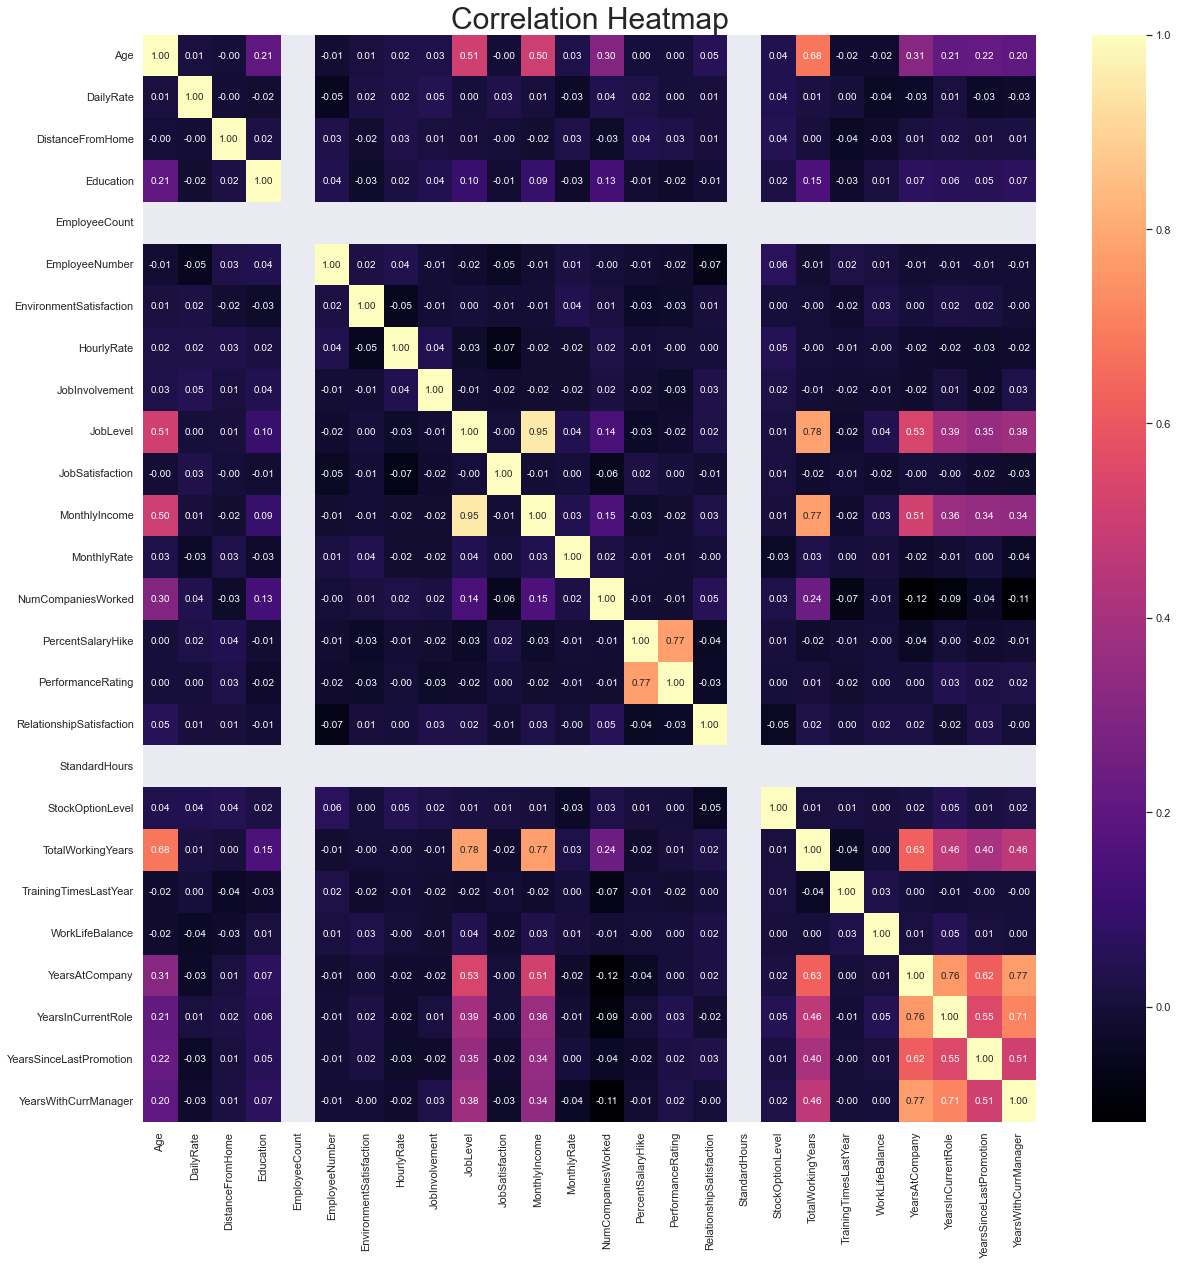

In [44]:
# Let us plot correlation Heatmap:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

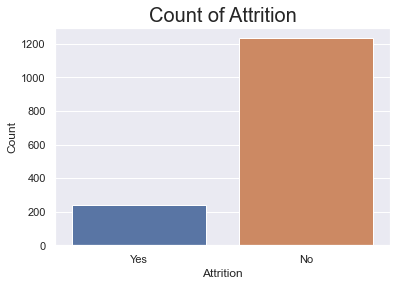

In [45]:
# Let us print count v/s attrition:
sns.countplot('Attrition', data=df)
plt.title('Count of Attrition', fontsize=20)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()
                        

In [46]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes=='object']
df[categorical_cols].sample(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
752,Yes,Travel_Rarely,Research & Development,Life Sciences,Female,Laboratory Technician,Single,Y,No
84,No,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Married,Y,No
604,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,No
1116,No,Travel_Rarely,Sales,Marketing,Male,Manager,Married,Y,No
613,No,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Married,Y,No


In [47]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes!='object']
df[numerical_cols].sample(5)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
165,50,1452,11,3,1,226,3,53,3,5,2,19926,17053,3,15,3,2,80,0,21,5,3,5,4,4,4
1336,55,836,2,4,1,1873,2,98,2,1,4,2662,7975,8,20,4,2,80,1,19,2,4,5,2,0,4
1292,39,766,20,3,1,1812,3,83,3,2,4,4127,19188,2,18,3,4,80,1,7,6,3,2,1,2,2
1167,35,763,15,2,1,1645,1,59,1,2,4,5440,22098,6,14,3,4,80,2,7,2,2,2,2,2,2
456,31,688,7,3,1,613,3,44,2,3,4,11557,25291,9,21,4,3,80,1,10,3,2,5,4,0,1


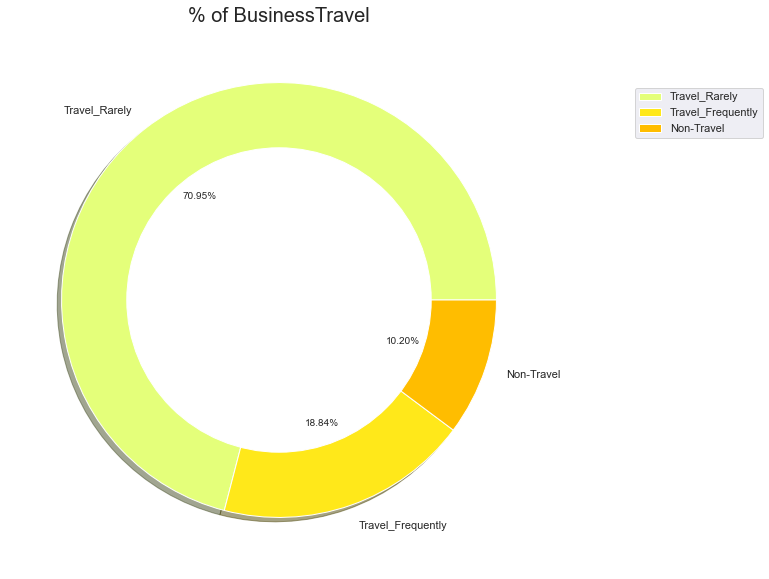

In [49]:
size = df['BusinessTravel'].value_counts()
labels = df['BusinessTravel'].unique()
colors = plt.cm.Wistia(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('% of BusinessTravel', fontsize=20)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

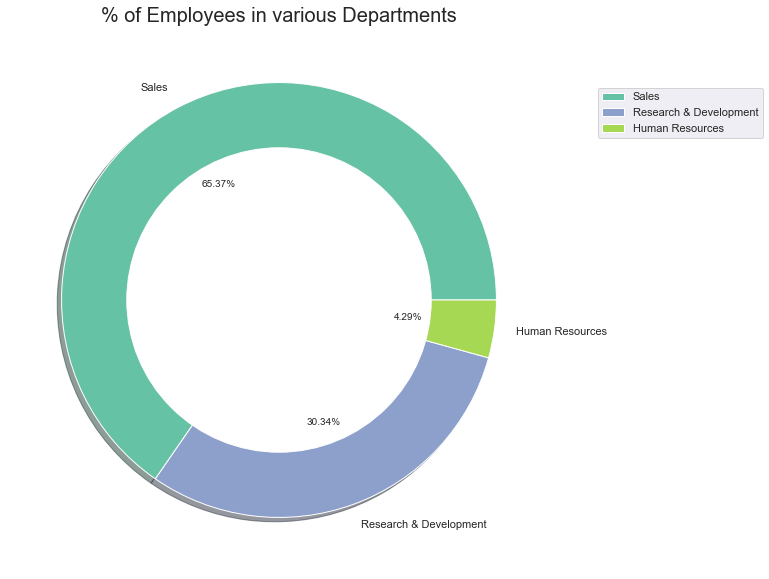

In [50]:
size = df['Department'].value_counts()
labels = df['Department'].unique()
colors = plt.cm.Set2(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('% of Employees in various Departments', fontsize=20)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

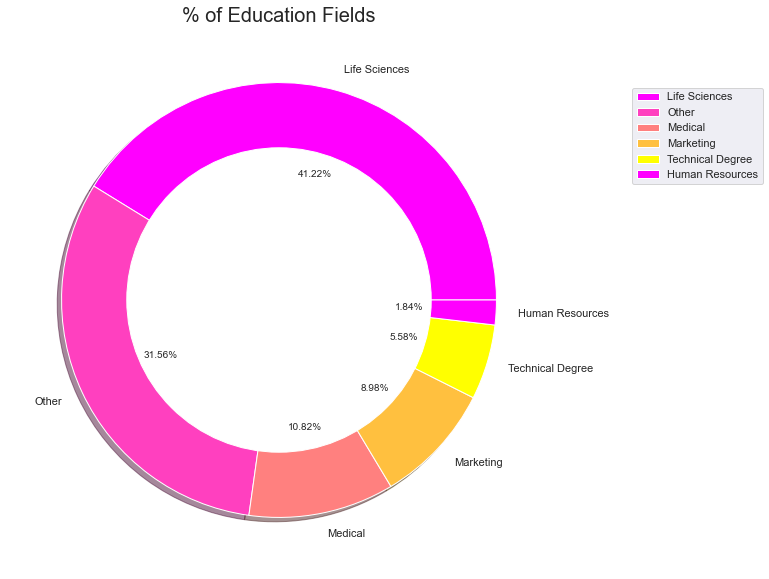

In [51]:
size = df['EducationField'].value_counts()
labels = df['EducationField'].unique()
colors = plt.cm.spring(np.linspace(0,1,5))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('% of Education Fields', fontsize=20)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

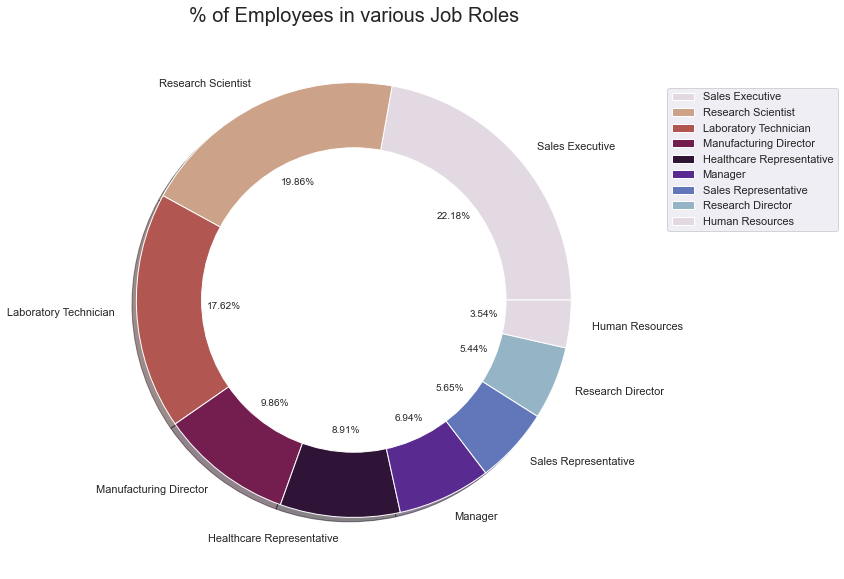

In [52]:
size = df['JobRole'].value_counts()
labels = df['JobRole'].unique()
colors = plt.cm.twilight_r(np.linspace(0,1,9))

plt.figure(figsize=(10,10))
circle = plt.Circle((0,0), radius=0.7, color='white')
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('% of Employees in various Job Roles', fontsize=20)
plt.legend(bbox_to_anchor=(0.5, 0., 0.9, 0.9));

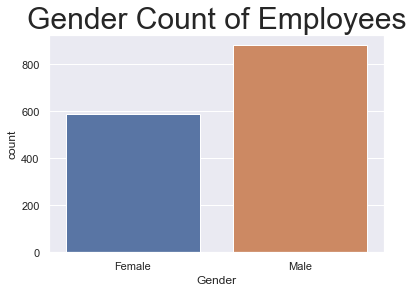

In [53]:
sns.countplot('Gender', data=df)
plt.title('Gender Count of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

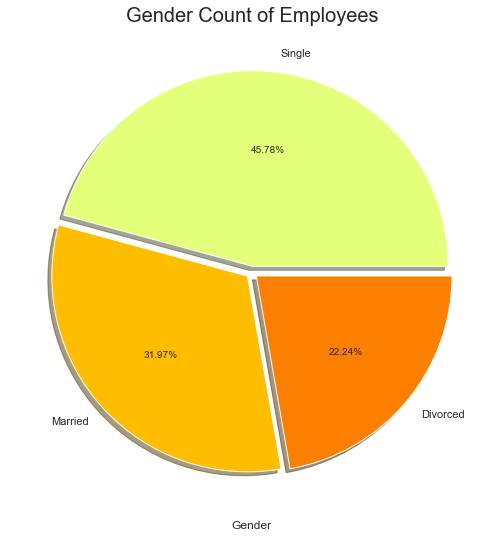

In [54]:
size=df['MaritalStatus'].value_counts()
labels=df['MaritalStatus'].unique()
colors=plt.cm.Wistia(np.linspace(0,1,3))
explode = [0.03, 0.03, 0.03]

plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%', shadow=True)
plt.title('Gender Count of Employees', fontsize=20)
plt.xlabel('Gender')
plt.show()

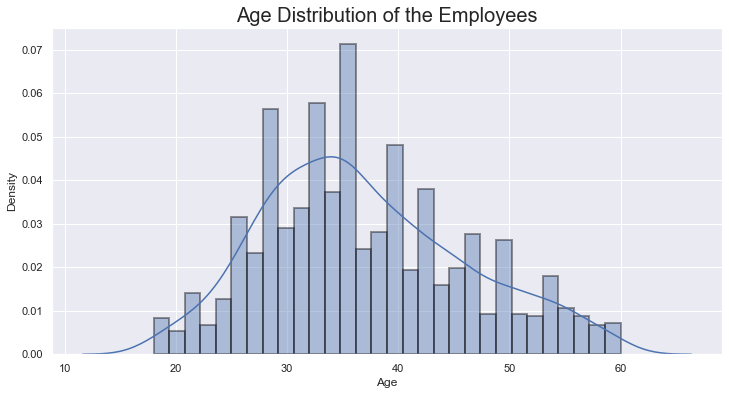

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('Age Distribution of the Employees', fontsize=20)
plt.xlabel('Age')
plt.show()

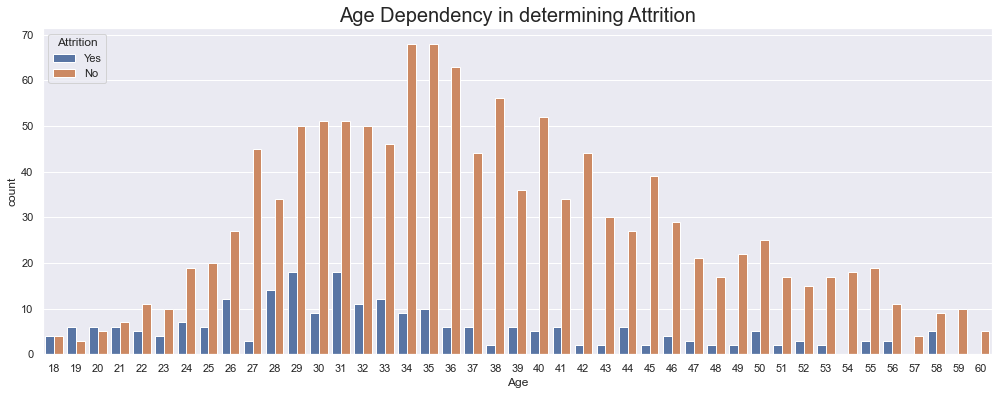

In [56]:
# Let us find Age Dependency in determining Attrition:
plt.figure(figsize=(17,6))
sns.countplot('Age', hue='Attrition', data=df)
plt.title('Age Dependency in determining Attrition', fontsize=20)
plt.xlabel('Age')
plt.show()

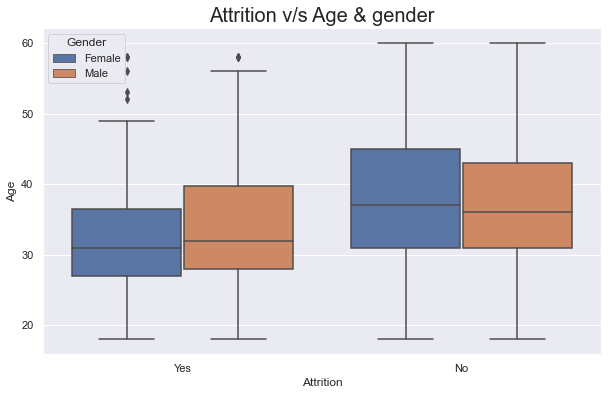

In [57]:
# Let us find Attrition v/s Age & gender:
plt.figure(figsize=(10,6))
sns.boxplot('Attrition', 'Age', hue='Gender', data=df)
plt.title('Attrition v/s Age & gender', fontsize=20)
plt.xlabel('Attrition')
plt.show()

<Figure size 1368x432 with 0 Axes>

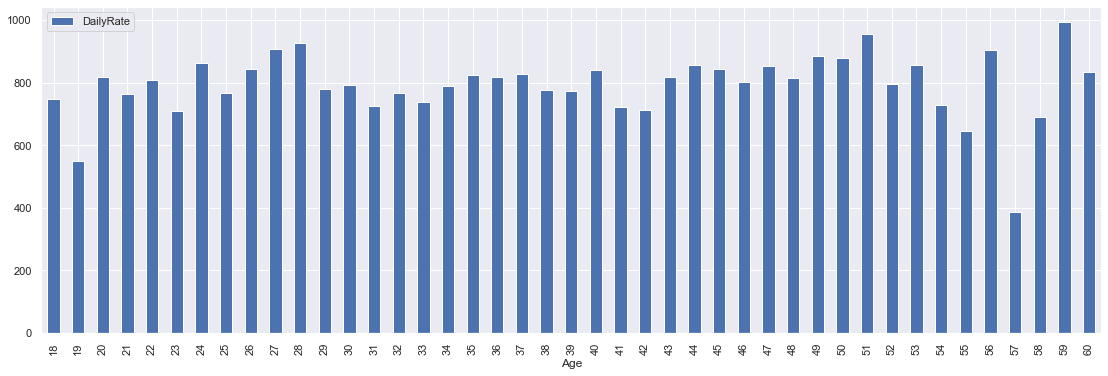

In [58]:
# Let us find Daily rate v/s Age:
plt.figure(figsize=(19,6))
x = df[['Age', 'DailyRate']].groupby('Age').mean()
x = pd.DataFrame(x)
x.sort_values(by = 'Age').plot(kind='bar', figsize=(19,6));

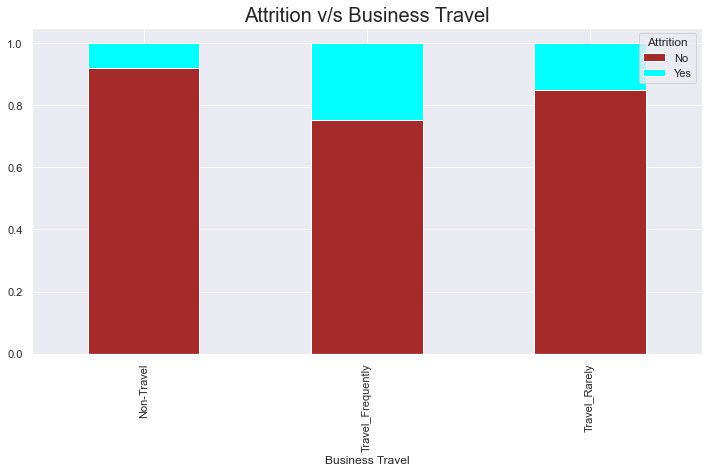

In [59]:
# Let us find Attrition v/s Business Travel:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Attrition v/s Business Travel', fontsize=20)
plt.xlabel('Business Travel')
plt.show()

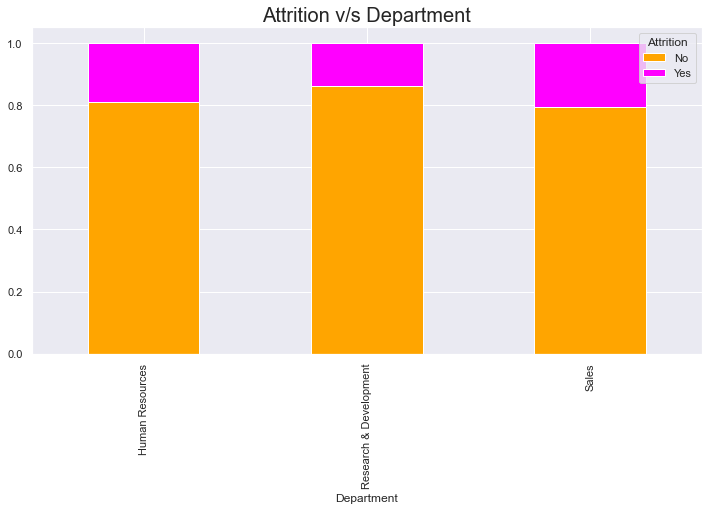

In [60]:
# Let us find Attrition v/s Department:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Attrition v/s Department', fontsize=20)
plt.xlabel('Department')
plt.show()


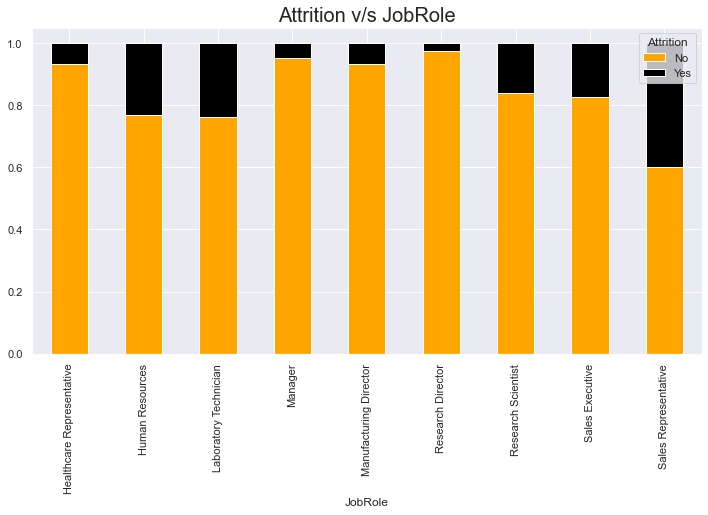

In [61]:
# Let us find Attrition v/s JobRole:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Attrition v/s JobRole', fontsize=20)
plt.xlabel('JobRole')
plt.show()

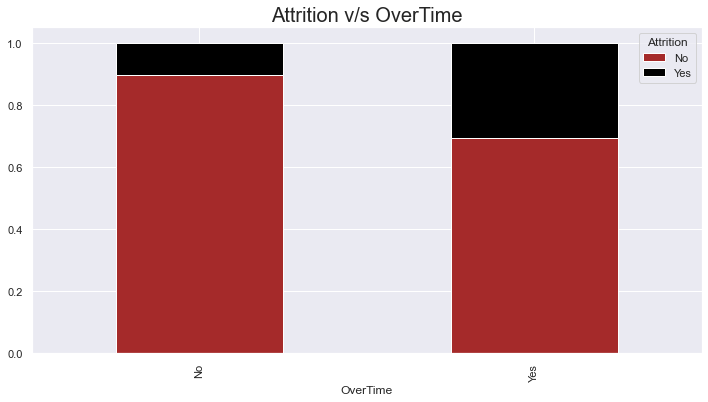

In [62]:
# Let us find Attrition v/s OverTime:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Attrition v/s OverTime', fontsize=20)
plt.xlabel('OverTime')
plt.show()

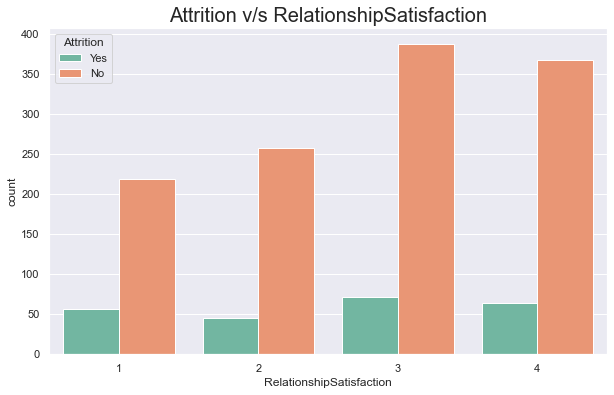

In [63]:
# Let us find Attrition v/s RelationshipSatisfaction:
plt.figure(figsize=(10,6))
sns.countplot('RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition v/s RelationshipSatisfaction', fontsize=20)
plt.xlabel('RelationshipSatisfaction')
plt.show()

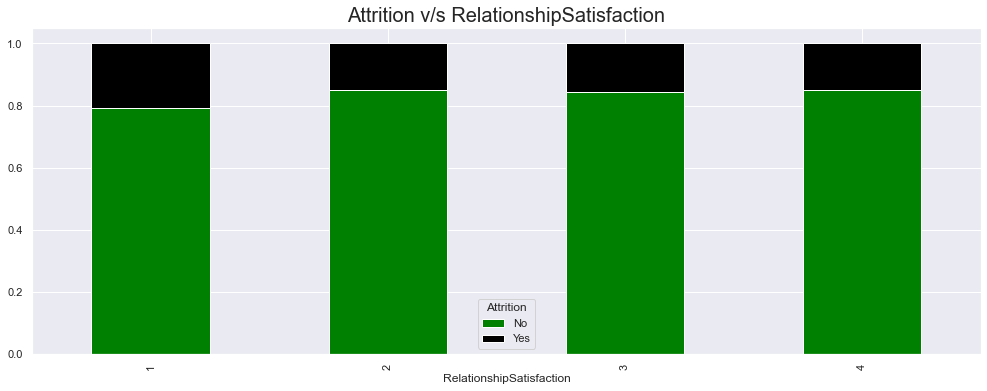

In [65]:
# Let us find Attrition v/s RelationshipSatisfaction:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Attrition v/s RelationshipSatisfaction', fontsize=20)
plt.xlabel('RelationshipSatisfaction')
plt.show()

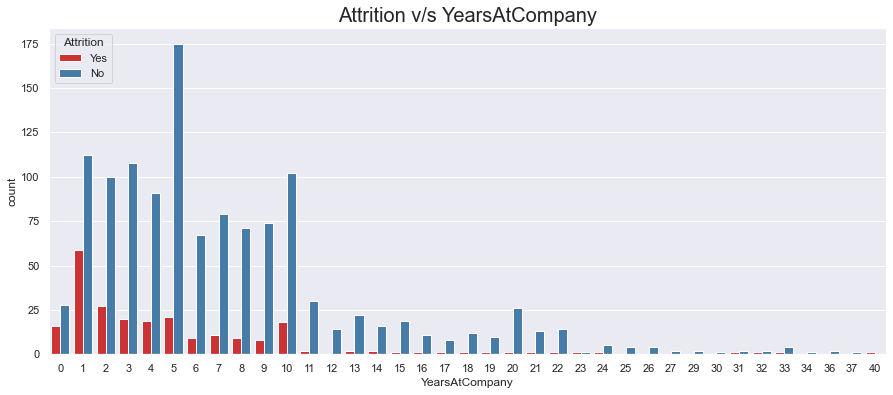

In [66]:
# Let us find Attrition v/s YearsAtCompany:
plt.figure(figsize=(15,6))
sns.countplot('YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition v/s YearsAtCompany', fontsize=20)
plt.xlabel('YearsAtCompany')
plt.show()


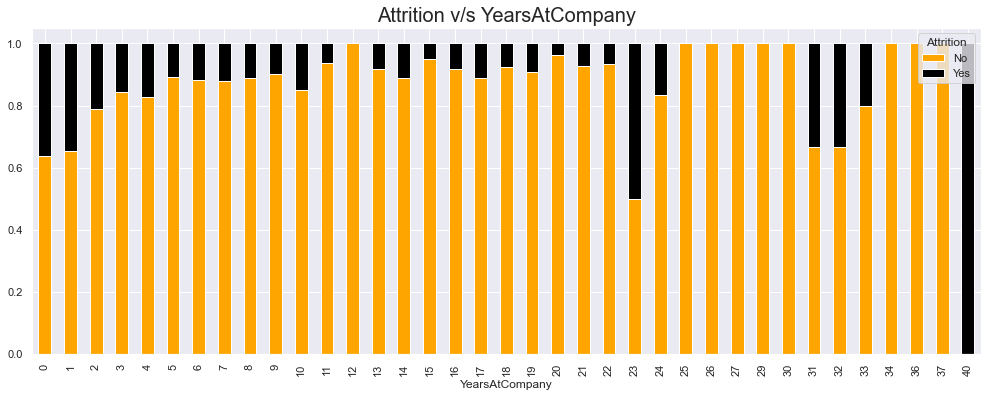

In [67]:
# Let us find Attrition v/s YearsAtCompany:
data=pd.crosstab(df['YearsAtCompany'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(17,6))
plt.title('Attrition v/s YearsAtCompany', fontsize=20)
plt.xlabel('YearsAtCompany')
plt.show()


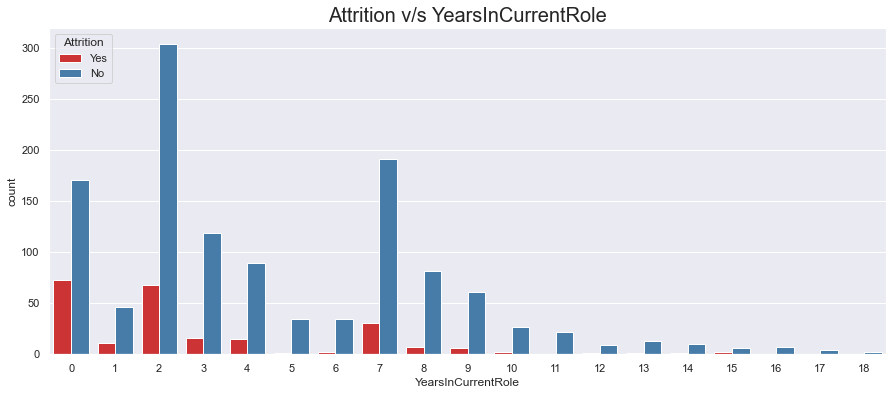

In [68]:
# Let us find Attrition v/s YearsInCurrentRole:
plt.figure(figsize=(15,6))
sns.countplot('YearsInCurrentRole', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition v/s YearsInCurrentRole', fontsize=20)
plt.xlabel('YearsInCurrentRole')
plt.show()


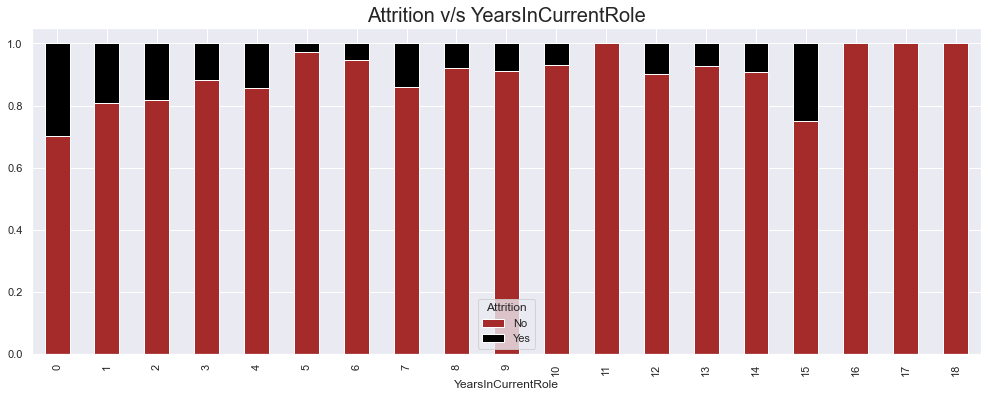

In [69]:
# Let us find Attrition v/s YearsInCurrentRole:
data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Attrition v/s YearsInCurrentRole', fontsize=20)
plt.xlabel('YearsInCurrentRole')
plt.show()

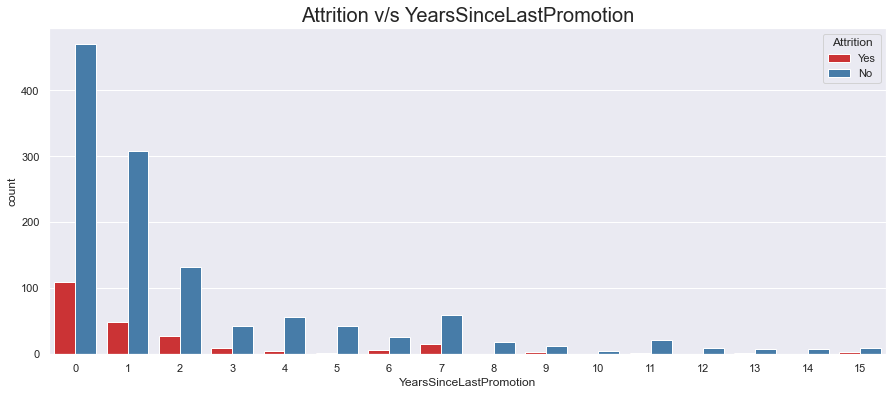

In [70]:
# Let us find Attrition v/s YearsSinceLastPromotion:
plt.figure(figsize=(15,6))
sns.countplot('YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition v/s YearsSinceLastPromotion', fontsize=20)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

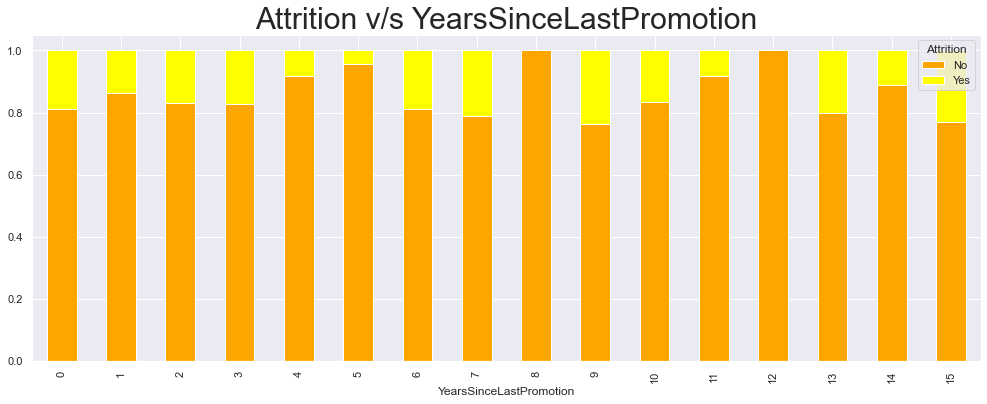

In [71]:
# Let us find Attrition v/s YearsSinceLastPromotion:
data=pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'], 
                                                figsize=(17,6))
plt.title('Attrition v/s YearsSinceLastPromotion', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

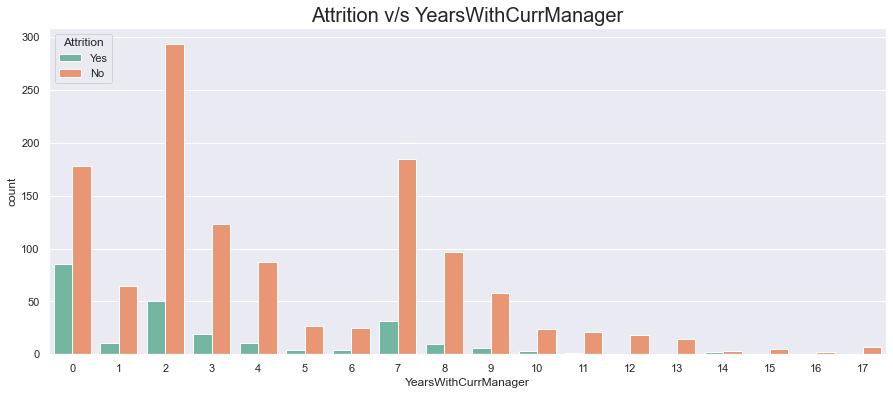

In [73]:
# Let us find Attrition v/s YearsWithCurrManager:
plt.figure(figsize=(15,6))
sns.countplot('YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition v/s YearsWithCurrManager', fontsize=20)
plt.xlabel('YearsWithCurrManager')
plt.show()

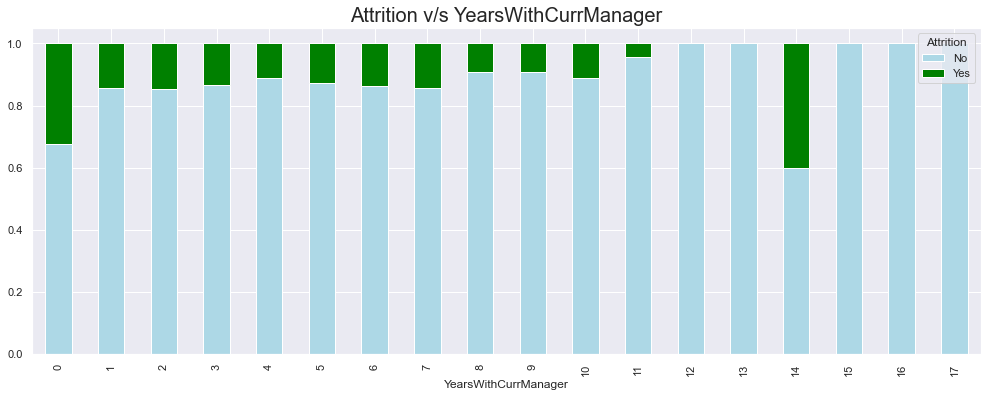

In [74]:
# Let us find Attrition v/s YearsWithCurrManager:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Attrition v/s YearsWithCurrManager', fontsize=20)
plt.xlabel('YearsWithCurrManager')
plt.show()

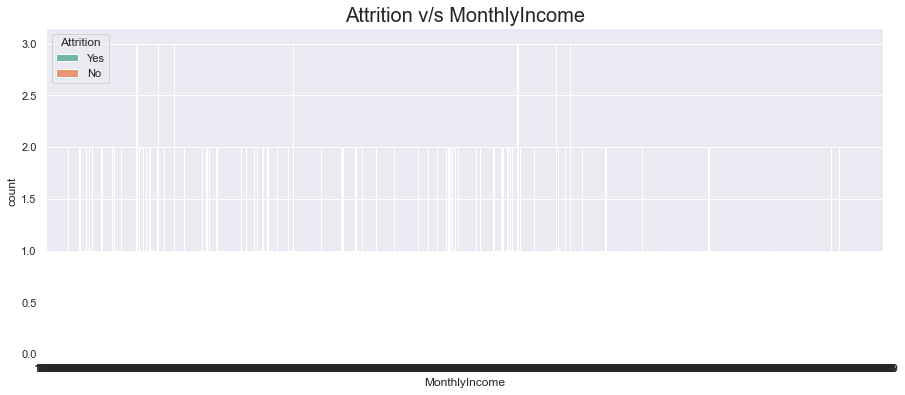

In [78]:
# Let us find Attrition v/s MonthlyIncome:
plt.figure(figsize=(15,6))
sns.countplot('MonthlyIncome', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition v/s MonthlyIncome', fontsize=20)
plt.xlabel('MonthlyIncome')
plt.show()

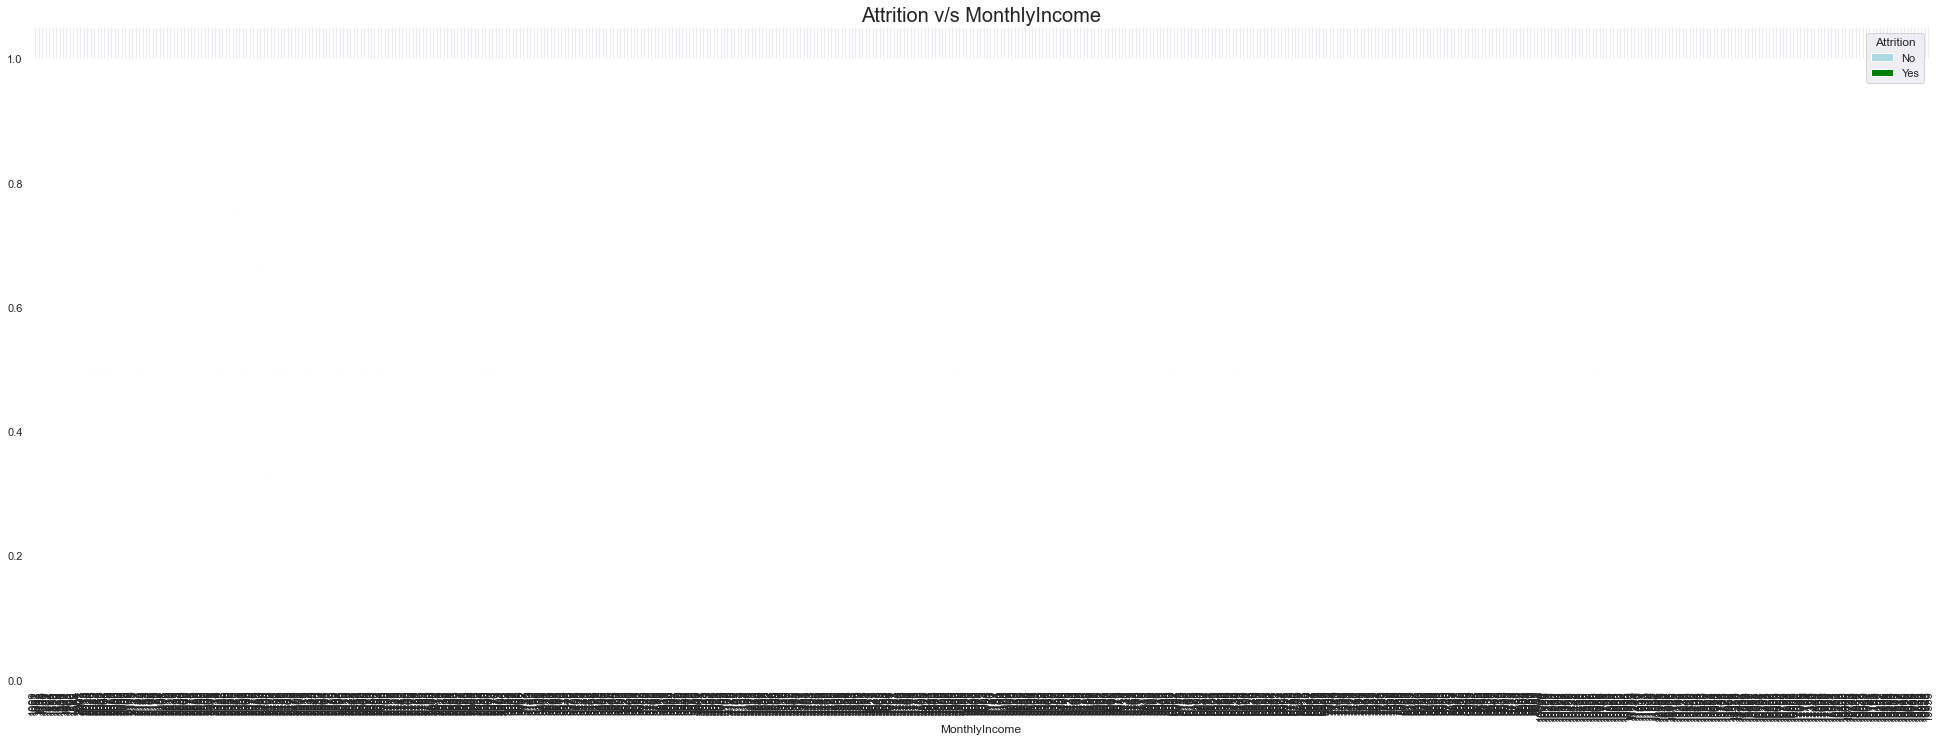

In [81]:
# Let us find Attrition v/s MonthlyIncome:
data=pd.crosstab(df['MonthlyIncome'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(34,12))
plt.title('Attrition v/s MonthlyIncome', fontsize=20)
plt.xlabel('MonthlyIncome')
plt.show()

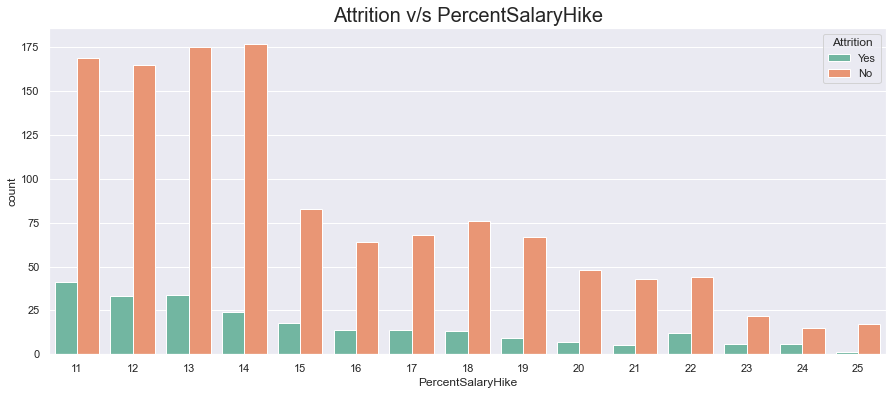

In [82]:
# Let us find Attrition v/s PercentSalaryHike:
plt.figure(figsize=(15,6))
sns.countplot('PercentSalaryHike', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition v/s PercentSalaryHike', fontsize=20)
plt.xlabel('PercentSalaryHike')
plt.show()

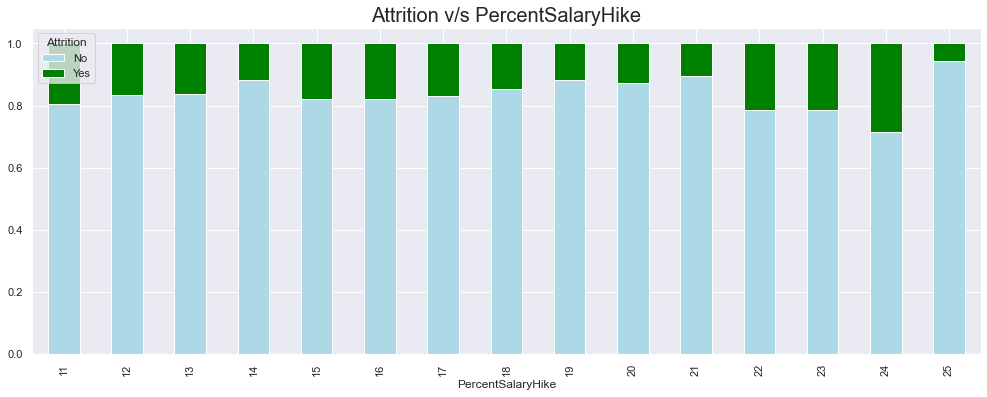

In [83]:
# Let us find Attrition v/s PercentSalaryHike:
data=pd.crosstab(df['PercentSalaryHike'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Attrition v/s PercentSalaryHike', fontsize=20)
plt.xlabel('PercentSalaryHike')
plt.show()

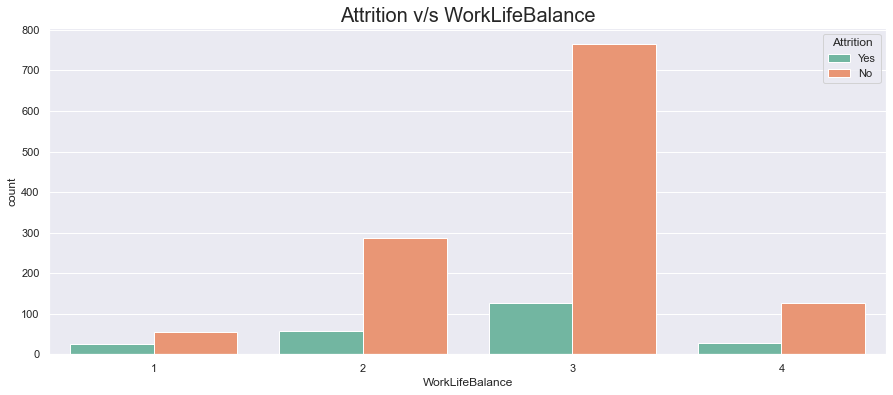

In [84]:
# Let us find Attrition v/s WorkLifeBalance:
plt.figure(figsize=(15,6))
sns.countplot('WorkLifeBalance', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition v/s WorkLifeBalance', fontsize=20)
plt.xlabel('WorkLifeBalance')
plt.show()

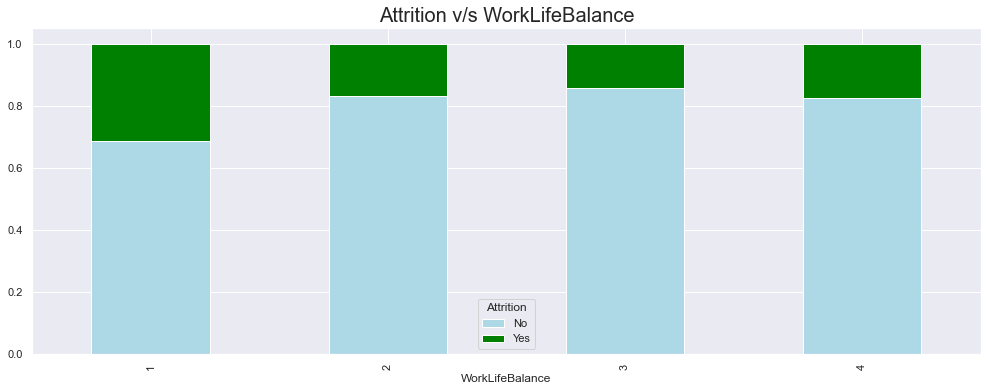

In [85]:
# Let us find Attrition v/s WorkLifeBalance:
data=pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Attrition v/s WorkLifeBalance', fontsize=20)
plt.xlabel('WorkLifeBalance')
plt.show()

## Conclusion :
As per analysis, below mentioned are top Reasons why Employees leave the Organization:
1. Age: Attrition is maximum in age of 34-35 Group mainly due to enough exeprience and more risk taking in this age.
2. No Overtime: Attrition was more for employees who don't have overtime. This May be due to fact that employees would like to have a higher amount of income due to overtime.
3. Monthly Income: Income is a huge factor for employees attrition.
4. PercentSalaryHike: Lesser salary hike leads to more employees attrition. 
5. Years at Company: Attrition was more in intital years with the organization and very less after 10 years.
6. Years since last promotion: Attrition was more after gettting promotion due to the fact that employees might be getting better opportunities showing promotion.
